In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Pasos
### - Cargar datos
### - Normalizar los datos
### - Agregar columna de unos
### - Calcular la predicción, o función de hipótesis h(x) = $\theta^{T}x$
### - Disminuir la Función de costo, o función de error cuadrático medio, mínimos cuadrados
     - ecuación normal
     - gradiente descendiente

## Cargando los datos

In [3]:
Data = pd.read_csv('petrol_consumption.csv')
X_train = Data.iloc[:,:4]
Y_train = Data.iloc[:,4]

print("X_train: ", X_train.shape)
print("Y_train: " , Y_train.shape)

X_train:  (48, 4)
Y_train:  (48,)


In [4]:
# número de entradas
n_el_train = len(X_train)
#################################################################
X_media = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
Y_media = Y_train.mean(axis=0)
Y_std = Y_train.std(axis=0)
#################################################################
# Normalization with broadcasting
X_train = (X_train - X_media)/X_std
Y_train = (Y_train - Y_media)/Y_std
#################################################################
# añadiendo la columna de ceros a mi conjunto de entrenamiento
X_train = np.concatenate((np.ones([n_el_train, 1]), X_train), axis=1)
n_features = X_train.shape[1]
print("X_train: ", X_train.shape)
print("Y_train: ", Y_train.shape)

X_train:  (48, 5)
Y_train:  (48,)


### Separando datos de entrenamiento y datos de prueba
70% entrenamiento y 30% prueba  

In [5]:
train_percentage = round(X_train.shape[0] * 0.7)
X_test = np.array(X_train[train_percentage:,:])
X_train = np.array(X_train[:train_percentage,:])
Y_test = np.array(Y_train[train_percentage:])
Y_train = np.array(Y_train[:train_percentage])

print("X_train: ", X_train.shape)
print("Y_train: ", Y_train.shape)

print("X_test: ", X_test.shape)
print("Y_test: ", Y_test.shape)

X_train:  (34, 5)
Y_train:  (34,)
X_test:  (14, 5)
Y_test:  (14,)


### Inicializando algunas variables
- el vector $\theta$

In [6]:
T = np.ones(n_features)
print(T)

[1. 1. 1. 1. 1.]


### Definiendo la Función de Costo y la función de Hipótesis $H_{\theta}(x)$
- Costo:
$$
J(\theta)=J(\theta_{0},\theta_{1},\dots,\theta_{n})\\
J(\theta) = \frac{1}{2m}\sum_{i=0}^{m}(y^{(i)} - h_{\theta}(x^{(i)}))^{2}
$$
- Hipótesis
$$
h_{\theta}(x) = \theta_{0}x_{0} + \theta_{1}x_{1} + \dots + \theta_{n}x_{n} = \theta^{T}x
$$

In [7]:
# Calculando la función de hipótesis
def H_theta(x, theta):
    return x.dot(theta)

def Cost(X, Y, T):
    """
    X: inputs vector
    Y: output vector
    T: tetha vector
    """
    my_cost = 0;
    for i in range(X.shape[0]):
        my_cost += (Y[i] - H_theta(X[i,:], T)) ** 2
    return (1.0 / (2 * X.shape[0])) * my_cost
# Probando la función de hipótesis
print("Función de hipótesis(prueba): ", H_theta(X_train[0],T))
# Printing the initial Cost
print("Costo Inicial: ", Cost(X_train, Y_train, T))

Función de hipótesis(prueba):  -0.6141430626951054
Costo Inicial:  2.572972615803596


# Gradiente descendiente: Batch
### In vector form:
$$
\theta := \theta - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}
$$
#### Notes: Sum on the function is defined as
$$
\sum^{n}_{i=0}(y^{(i)} - h_{\theta}(x^{(i)}))x^{(i)}
$$

In [8]:
# gradiente descendiente
def Gradiente_Descendiente(X, Y, Tvec, it, alpha, costs):
    """
    X: el conjunto de entrenamiento
    Y: el vector de salidas
    tetha: el vector resultado
    it: el número de iteraciones
    alpha: tasa de aprendizaje
    """
    # Gradiente Descendiente Batch
    Set_size = X.shape[0];
    for ite in range(it):
        Tvec = Tvec + (alpha * (1.0 / Set_size)) * (Y - Tvec @ X.T) @ X
        # calculating the cost and joining it to the list of cost
        costs.append(Cost(X, Y, Tvec))
    return Tvec

In [9]:
iterations = 100
learning_rate = 0.5
costs = []
T = Gradiente_Descendiente(X_train, Y_train, T, iterations, learning_rate, costs)
print("Resultado del gradiente descendiente: ", T)

Resultado del gradiente descendiente:  [-0.0759938  -0.1017587  -0.37787855  0.09885241  0.64444599]


## Graficando la curva de costos entrenamiento

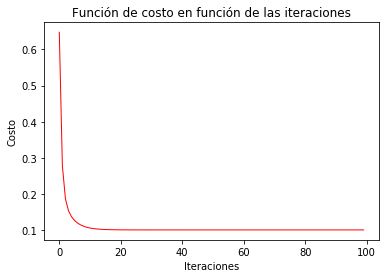

In [10]:
times = range(iterations)
plt.plot(times, costs, "r-", linewidth=1)
plt.title("Función de costo en función de las iteraciones")
plt.ylabel('Costo')
plt.xlabel("Iteraciones")
plt.show()

## Graficando la curva de costos prueba

In [25]:
iterations = 100
learning_rate = 0.5
costs = []
T = Gradiente_Descendiente(X_test, Y_test, T, iterations, learning_rate, costs)
print("Resultado del gradiente descendiente: ", T)

Resultado del gradiente descendiente:  [-0.14811126 -0.59682184 -0.35030887 -0.34663407  0.6979032 ]


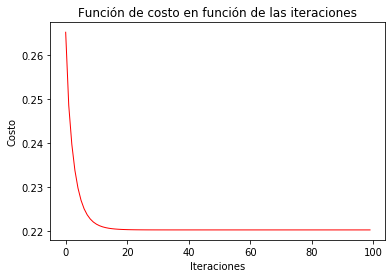

In [26]:
times = range(iterations)
plt.plot(times, costs, "r-", linewidth=1)
plt.title("Función de costo en función de las iteraciones")
plt.ylabel('Costo')
plt.xlabel("Iteraciones")
plt.show()

# Ecuación Normal
$$
    \theta = (X^{T}X)^{-1}X^{T}y
$$

In [11]:
# retorna la respuesta usando la ecuación normal
def Normal(X,Y):
    return np.linalg.inv(X.T @ X) @ X.T @ Y

In [12]:
T = Normal(X_train, Y_train)
print("Resultado de la ecuación normal: ", T)

Resultado de la ecuación normal:  [-0.07599377 -0.10175881 -0.37787853  0.09885232  0.64444595]


# Experimento 1  
Experimento 1: Mostrar en una tabla el Error Cuadrático Medio de la Regresión Lineal usando  
la Ecuación Normal para los conjuntos de entrenamiento y prueba de "Consumo de Petróleo",
"Precio Viviendas" y "Temperatura Océano"

In [13]:
T = np.zeros(n_features)
T = Normal(X_train, Y_train)
print("Costo con la ecuación normal[conjunto de entrenmiento]:", Cost(X_train, Y_train, T))
print("Costo con la ecuación normal[conjunto de prueba]:", Cost(X_test, Y_test, T))

Costo con la ecuación normal[conjunto de entrenmiento]: 0.10133406978728143
Costo con la ecuación normal[conjunto de prueba]: 0.36391222077466157


# Experimento 2
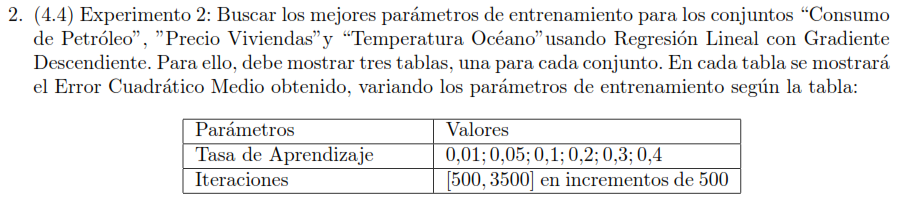

In [22]:
# tasa de aprendizaje: 0.01
# iteraciones: 500, 1000, 1500, 2000, 3000, 3500
T = np.zeros(n_features)
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
iterations = [500, 1000, 1500, 2000, 2500, 3000, 3500]
costs = []
times = []
print(f"Errores cuadráticos")
for i in range(len(learning_rates)):
    print(f"Error cuadrático con tasa de aprendizaje {learning_rates[i]}")
    for j in range(len(iterations)):
        times = range(iterations[j])
        Gradiente_Descendiente(X_train, Y_train, T, iterations[j], learning_rates[i], costs)
        print(f"Costo [{iterations[j]} iteraciones]: ", costs[-1])



Errores cuadráticos
Error cuadrático con tasa de aprendizaje 0.01
Costo [500 iteraciones]:  0.1017574318116662
Costo [1000 iteraciones]:  0.10135324764943776
Costo [1500 iteraciones]:  0.10133509918525148
Costo [2000 iteraciones]:  0.1013341251772401
Costo [2500 iteraciones]:  0.10133407276780863
Costo [3000 iteraciones]:  0.10133406994766334
Costo [3500 iteraciones]:  0.10133406979591161
Error cuadrático con tasa de aprendizaje 0.05
Costo [500 iteraciones]:  0.10133407252177395
Costo [1000 iteraciones]:  0.1013340697872826
Costo [1500 iteraciones]:  0.10133406978728145
Costo [2000 iteraciones]:  0.10133406978728142
Costo [2500 iteraciones]:  0.10133406978728143
Costo [3000 iteraciones]:  0.10133406978728143
Costo [3500 iteraciones]:  0.10133406978728143
Error cuadrático con tasa de aprendizaje 0.1
Costo [500 iteraciones]:  0.10133406978728234
Costo [1000 iteraciones]:  0.10133406978728143
Costo [1500 iteraciones]:  0.1013340697872815
Costo [2000 iteraciones]:  0.1013340697872815
Costo

## Algunas pruebas extra

Resultado del gradiente descendiente:  [-0.07502129 -0.13622439 -0.36806731  0.07049084  0.62132943]
Costo Final:  0.1017574318116662


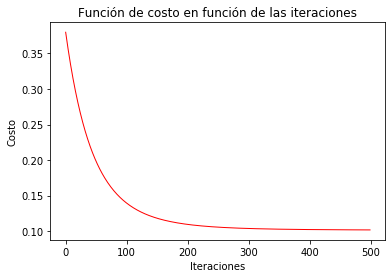

In [23]:
# tasa de aprendizaje: 0.01
# Iteraciones: 500
T = np.zeros(n_features)
iterations = 500
learning_rate = 0.01
costs = []
T = Gradiente_Descendiente(X_train, Y_train, T, iterations, learning_rate, costs)
print("Resultado del gradiente descendiente: ", T)
print("Costo Final: ", costs[-1])
times = range(iterations)
plt.plot(times, costs, "r-", linewidth=1)
plt.title("Función de costo en función de las iteraciones")
plt.ylabel('Costo')
plt.xlabel("Iteraciones")
plt.show()

Resultado del gradiente descendiente:  [-0.07599376 -0.10175888 -0.37787852  0.09885227  0.64444593]
Costo Final:  0.1013340697872826


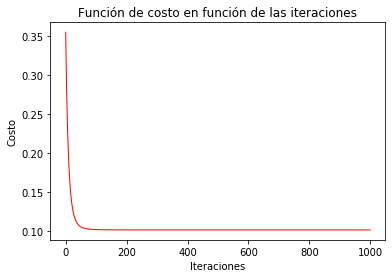

In [16]:
# tasa de aprendizaje: 0.05
# Iteraciones: 1000
T = np.zeros(n_features)
iterations = 1000
learning_rate = 0.05
costs = []
T = Gradiente_Descendiente(X_train, Y_train, T, iterations, learning_rate, costs)
print("Resultado del gradiente descendiente: ", T)
print("Costo Final: ", costs[-1])

times = range(iterations)
plt.plot(times, costs, "r-", linewidth=1)
plt.title("Función de costo en función de las iteraciones")
plt.ylabel('Costo')
plt.xlabel("Iteraciones")
plt.show()

Resultado del gradiente descendiente:  [-0.07599377 -0.10175881 -0.37787853  0.09885232  0.64444595]
Costo Final:  0.1013340697872815


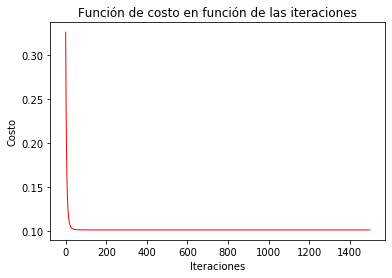

In [17]:
# tasa de aprendizaje: 0.1
# Iteraciones: 1500
T = np.zeros(n_features)
iterations = 1500
learning_rate = 0.1
costs = []
T = Gradiente_Descendiente(X_train, Y_train, T, iterations, learning_rate, costs)
print("Resultado del gradiente descendiente: ", T)
print("Costo Final: ", costs[-1])

times = range(iterations)
plt.plot(times, costs, "r-", linewidth=1)
plt.title("Función de costo en función de las iteraciones")
plt.ylabel('Costo')
plt.xlabel("Iteraciones")
plt.show()

Resultado del gradiente descendiente:  [-0.07599377 -0.10175881 -0.37787853  0.09885232  0.64444595]
Costo Final:  0.10133406978728146


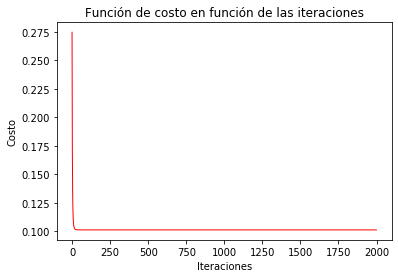

In [18]:
# tasa de aprendizaje: 0.2
# Iteraciones: 2000
T = np.zeros(n_features)
iterations = 2000
learning_rate = 0.2
costs = []
T = Gradiente_Descendiente(X_train, Y_train, T, iterations, learning_rate, costs)
print("Resultado del gradiente descendiente: ", T)
print("Costo Final: ", costs[-1])

times = range(iterations)
plt.plot(times, costs, "r-", linewidth=1)
plt.title("Función de costo en función de las iteraciones")
plt.ylabel('Costo')
plt.xlabel("Iteraciones")
plt.show()

Resultado del gradiente descendiente:  [-0.07599377 -0.10175881 -0.37787853  0.09885232  0.64444595]
Costo Final:  0.10133406978728145


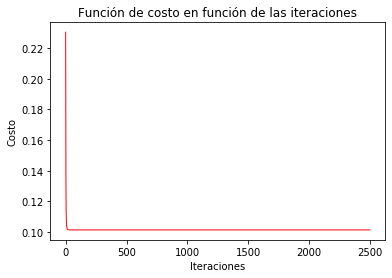

In [19]:
# tasa de aprendizaje: 0.3
# Iteraciones: 2500
T = np.zeros(n_features)
iterations = 2500
learning_rate = 0.3
costs = []
T = Gradiente_Descendiente(X_train, Y_train, T, iterations, learning_rate, costs)
print("Resultado del gradiente descendiente: ", T)
print("Costo Final: ", costs[-1])

times = range(iterations)
plt.plot(times, costs, "r-", linewidth=1)
plt.title("Función de costo en función de las iteraciones")
plt.ylabel('Costo')
plt.xlabel("Iteraciones")
plt.show()

Resultado del gradiente descendiente:  [-0.07599377 -0.10175881 -0.37787853  0.09885232  0.64444595]
Costo Final:  0.10133406978728143


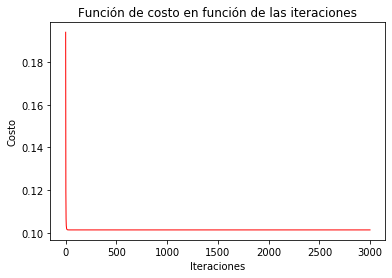

In [20]:
# tasa de aprendizaje: 0.4
# Iteraciones: 3000
T = np.zeros(n_features)
iterations = 3000
learning_rate = 0.4
costs = []
T = Gradiente_Descendiente(X_train, Y_train, T, iterations, learning_rate, costs)
print("Resultado del gradiente descendiente: ", T)
print("Costo Final: ", costs[-1])

times = range(iterations)
plt.plot(times, costs, "r-", linewidth=1)
plt.title("Función de costo en función de las iteraciones")
plt.ylabel('Costo')
plt.xlabel("Iteraciones")
plt.show()